# K-Means Clustering의 장단점과 평균 이동
* K-Means Clustering은 전체 N개의 데이터를 K개의 클러스터로 빠르게 묶어낸다는 장점은 있지만, 클러스터의 개수가 사전에 결정되어야 하고 초기 중심점(Centroid) 설정에 따라 수렴 여부가 크게 좌우된다는 한계가 있음
* 시간이 조금 더 걸리더라도 데이터에 따라 적절한 클러스터 개수를 발견하여 클러스터링해야 할 경우에는 비모수 기법을 사용해야 함
* 대표적인 비모수 클러스터링 기법에는 평균점 이동(Mean shift) 클러스터링이 있음

# 연속 분포를 클러스터링하기
* 데이터 밀도가 다음과 같은 경우를 고려<br>
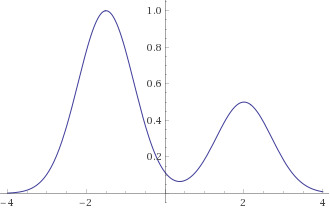<br>
* -2, +2 부근에서 밀도가 매우 높은 것을 볼 수 있음
* 따라서 이 데이터를 자연스럽게 나눠야한다면 이 분포에서 두 종류의 최빈값(mode)를 기준으로 데이터를 분할하면 됨
* 연속 분포에서는 이러한 꼭대기를 알기 쉽지만, 이산 분포를 이루는 데이터에서 mode를 찾기는 생각보다 어려움

# 이산 데이터의 밀도
* 한국 성인의 키 분포를 알아서 그 밀도를 추정하여 클러스터링하려고 한다고 가정해 봄<br>
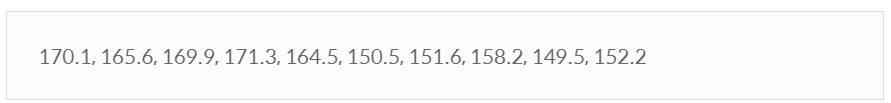<br>
* 총 10개의 점이 있는데 겹치는 점이 하나도 없어 이 데이터를 바탕으로 하면 mode는 총 10개가 됨
* 따라서 이를 반올림해서 데이터를 다듬음<br>
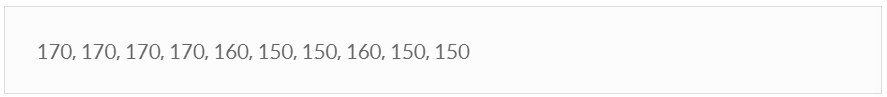<br>
* 이 경우 170이 4개, 160이 2개, 150이 4개이므로 mode는 170, 150이 됨
* 이산 데이터를 적당히 구간을 나누어 그 개수를 세어 전체 분포를 보는 방식을 히스토그램(Histogram)이라고 함<br>
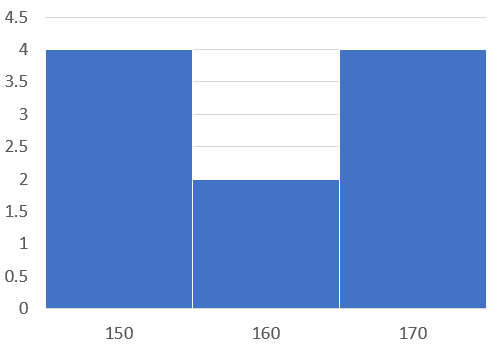<br>
* 히스토그램은 이산 데이터의 분포를 추정하는 가장 손쉬운 방식
* 하지만, `폭(bandwidth)을 어떻게 정할지에 따라 전체 분포의 모양이 크게 달라짐`
* 위 그래프는 폭이 10인 경우의 모양이며, 폭을 2로 설정하고 같은 데이터의 히스토그램을 그리면 아래와 같음<br>
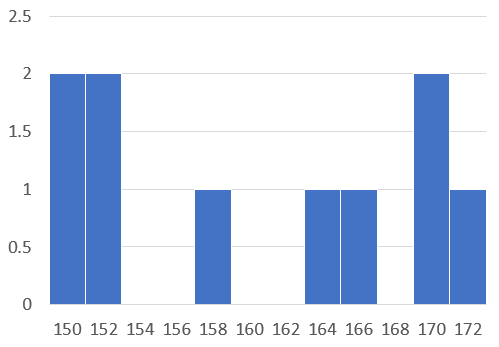<br>
* 또한, `히스토그램의 경우 경계가 불연속적임`
* 그래서 등장한 방법이 `커널 밀도 추정(Kernel Density Estimation)`임

# 커널 밀도 추정(Kernel Density Estimation)
* 이 기법의 기본 아이디어는 관찰된 데이터들을 경계가 명확한 점으로 보는 것이 아니라 경계가 흐리멍텅한 안개로 보자는 것
* 즉, 170.1이라는 점이 관찰되었을 경우 실제로는 170.1은 1개, 170.0이나 170.05는 0개가 있는 게 맞지만 이렇게 빡빡하게 굴지말고 조금 더 관대하게 170.0은 0.1개, 170.05는 0.2개, 170.1은 0.5개쯤 있다고 봐주자는 것
* 즉, 이렇게 관대하게 봐줄 경우 어떤 수치를 들이밀어도 그 값이 우리 데이터 내에 몇 개가 있는지를 계산해줄 수 있음
* 이 계산방법을 수학에서는 `커널(Kernel)`이라고 함
* 대표적인 커널 함수로 가우시안 함수(Gaussian)가 있음
* 이 함수는 정규 분포에서 흔히 보던 모양을 띔<br>
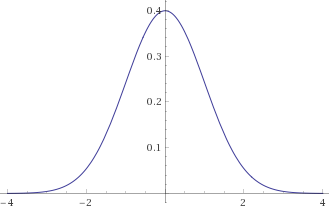<br>
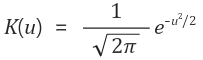<br>
* 가우시안 커널의 경우 위와 같은 수식을 따라서 계산이 되는데, 여기서 u는 원데이터로부터의 거리가 됨
* 즉, 원데이터인 170.1로부터 거리가 0인 경우 그 데이터는 K(0) = 0.39개 정도 있다고 봐주는 것임
* 커널을 적용하여 데이터의 분포를 그리려면 다음처럼 계산<br>
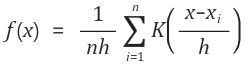<br>
* 여기서 xi는 각각의 데이터, h는 얼마나 관대하게 봐줄지를 설정하는 폭(bandwidth) 파라미터임
* 위 데이터에 가우시안 커널을 적용해 h = 1로 그리면 다음과 같이 됨<br>
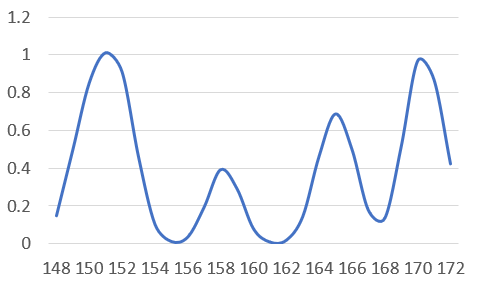<br>
* h를 바꾸면 관대함을 조절할 수 있음
* h가 커질수록 더 완만한 분포를 보이게 되고, h가 작을수록 더 뾰족뾰족한 분포를 보이게 됨
* 예를 들어 h = 2.3으로 할 경우 아래와 같은 모양이 됨<br>
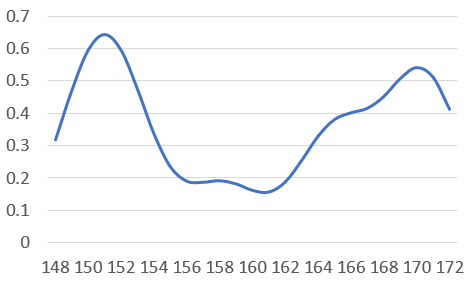

# Mean Shift를 이용한 클러스터링
* Mean Shift는 평균점 이동인데, 기본적인 아이디어는 각 점들에 대해 데이터의 분포에서 mode를 찾아 이동하다보면 점들이 적당하게 모일 것이라는 것<br>
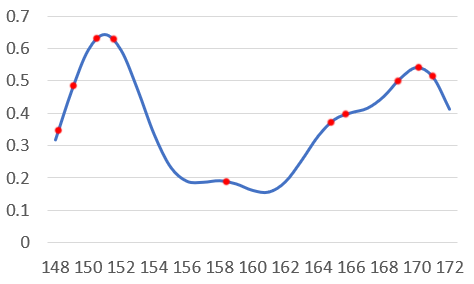<br>
* 가우시안 커널로 밀도를 추정한 그래프에 실제 데이터들 10개를 점으로 찍어봄
* 이 점들 각각에 대해 주변의 밀도를 계산해서 밀도가 높은 쪽으로 조금씩 이동시킨다고 해봄<br>
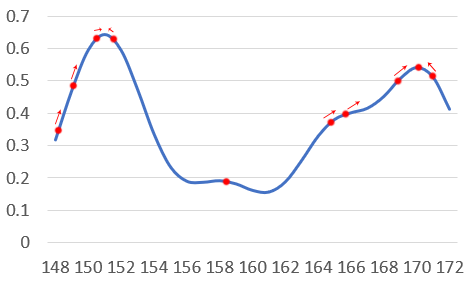<br>
* 각 점들의 이동을 화살표로 표현하면 위와 같이 되고, 조금씩 움직이다보면 처음 10개의 점들은 몇 개의 점으로 모이게 될 것
* 위의 예시의 경우 왼쪽 4개는 왼쪽 정상으로 모이게 될 것이고, 오른쪽 5개의 경우 오른쪽 정상에, 가운데 지점에 있는 점은 혼자 남아 총 3개의 클러스터가 생성
* 이것이 Mean Shift 클러스터링 알고리즘의 기본적인 아이디어
* 실제로는 위와 같이 연속적인 분포가 주어지지 않고 점들만 주어지기 때문에 이를 계산하기 위해서는 각 지점을 중심으로 하는 커널을 적용하여 새로운 평균을 구하는 식으로 mode를 향해 올라가는 방향을 찾고자 함<br>
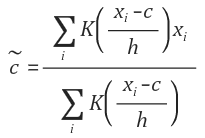<br>
* 정확히는 위와 같은 식을 통해 mode를 향하는 방향을 찾음
* xi는 각각의 데이터, h는 bandwidth의 크기, c는 현재 점의 지점, c~는 새로운 점의 지점임
* 예를 들어 149.5라는 점을 시작 지점으로 이 위치에서 위 식을 따라 h = 2.3으로 가우시안 커널 함수를 계산해서 가중 평균을 구해봄
* 최초의 c는 149.5이고 아래와 같이 계산<br>
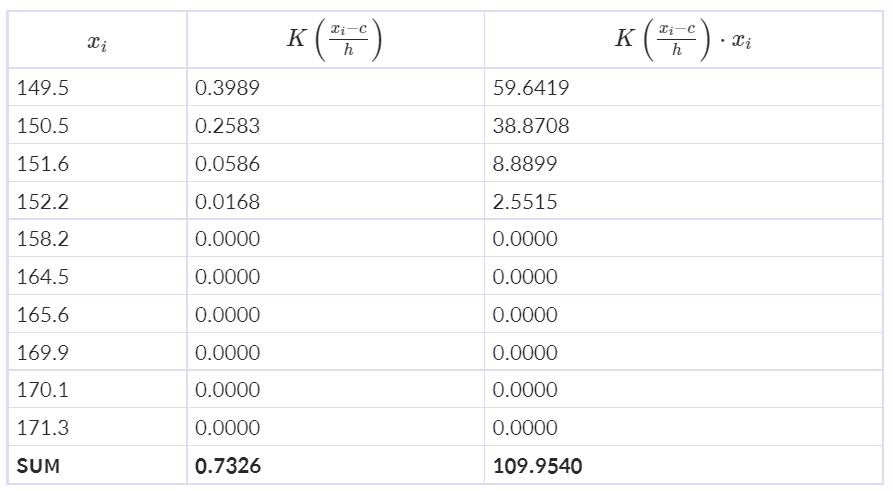<br>
* 새로운 c는 109.9540 / 0.7326 = 150.1이 됨 => 이를 다시 반복<br>
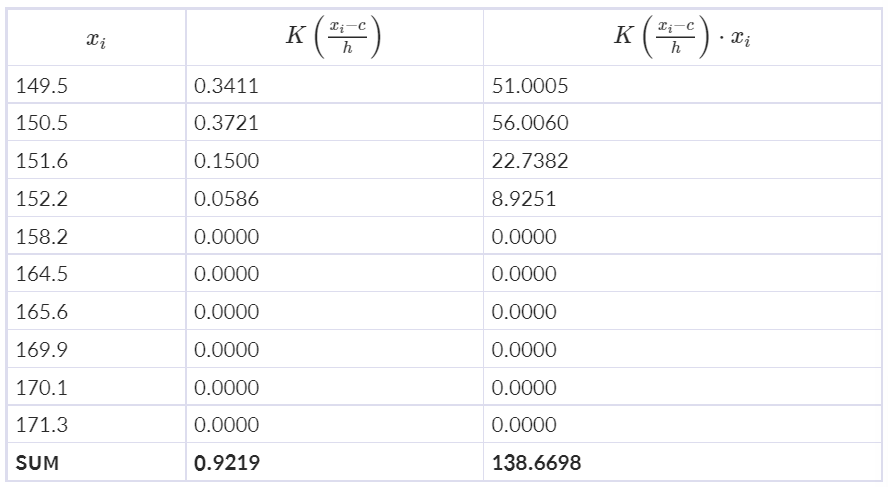<br>
* 이제 새로운 c는 138.6698 / 0.9219 = 150.4임 => 이를 다시 반복<br>
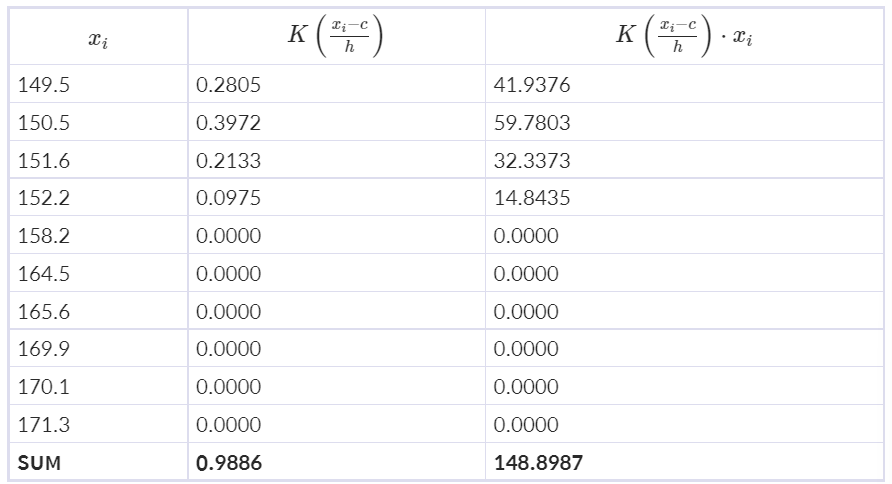<br>
* 다시 새로운 c는 148.8987 / 0.9986 = 150.6임
* 이렇게 c를 계산하는 것을 반복하면 그 값이 151.1에서 151.2를 벗어나지 않고 c값이 수렴하게 됨
* 즉, 이 지점이 149.5에서 출발했을 때 오르게 되는 최종적인 정상 지점이 되는 것
* 나머지 점들에 대해서도 똑같이 계산을 수행하면 그 점들이 오르게 되는 정상지점이 결정됨
* 정상 지점이 동일한 점들의 경우는 동일한 클러스터로 묶을 수 있게 되는 것
* 각 점들에 대해서 그 점들의 최종 도착지를 정리해보면 다음과 같음<br>
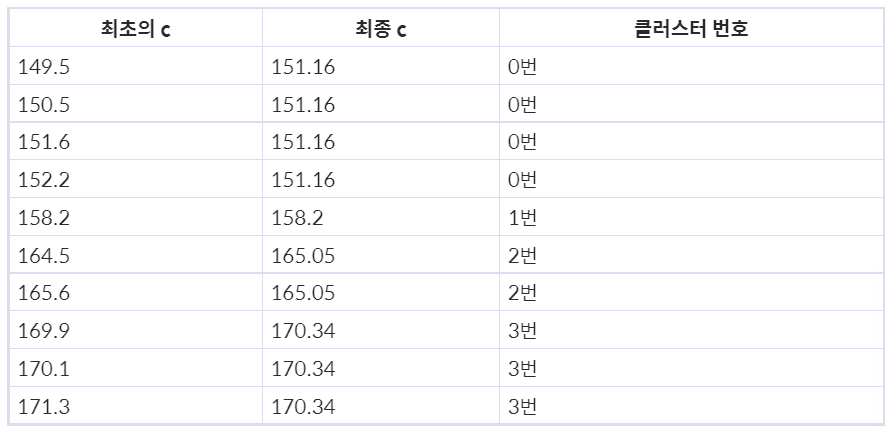<br>
* 이렇게 10개의 점은 총 4개의 클러스터로 묶이게 되었음
* 물론 이 결과는 bandwidth의 크기인 h값에 따라 크게 달라질 수 있음
* 따라서, 적절한 h값을 잘 정하는 것이 중요
* 이렇게 보면 좋은 방법이지만 데이터가 늘어날수록 연산량이 급증하기 때문에 생각보다 널리 쓰이지 못함

`[출처] https://bab2min.tistory.com/637`